![](escudo.png)
    
# Analisis masivos de datos
## 5.3.1.5 Verificación de velocidades de Internet
### Jose Gabriel Rodriguez Rivas
### Jorge Alberto Hernabdez


### Parte 1: Determinar si la velocidad de Internet proporcionada cumple con la establecida en el contrato del proveedor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df_compact=pd.read_csv('rpi_data_compact.csv')
df_compact.head()

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25
3,3,19.332,91.81,14.22,2016-11-24,13:37:57
4,4,22.494,92.05,14.08,2016-11-24,13:38:27


In [3]:
df_compact=df_compact.dropna()
df_compact.head()

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25
3,3,19.332,91.81,14.22,2016-11-24,13:37:57
4,4,22.494,92.05,14.08,2016-11-24,13:38:27


In [4]:
df_compact['Ping (ms)'] = df_compact['Ping (ms)'].apply(lambda val: float(val))
df_compact['Download (Mbit/s)'] = df_compact['Download (Mbit/s)'].apply(lambda val: float(val))

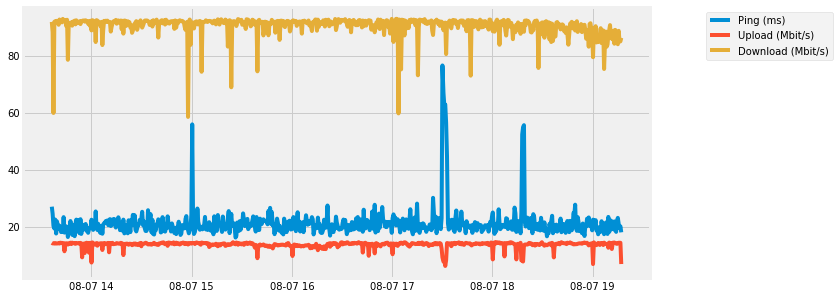

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
t = pd.to_datetime(df_compact['Time'])

# Plot three curves of different colors
ax.plot(t, df_compact['Ping (ms)'], label='Ping (ms)')
ax.plot(t, df_compact['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df_compact['Download (Mbit/s)'], label='Download (Mbit/s)')

# Insert a legend outside of the main plot
ax.legend(bbox_to_anchor=(1.3, 1.))
plt.show()

In [6]:
# Record the values you consider acceptable in these variables
# Examples:
acceptable_upload = 13 #Mbit/s
acceptable_download = 88 #Mbit/s
acceptable_ping = 20 #ms

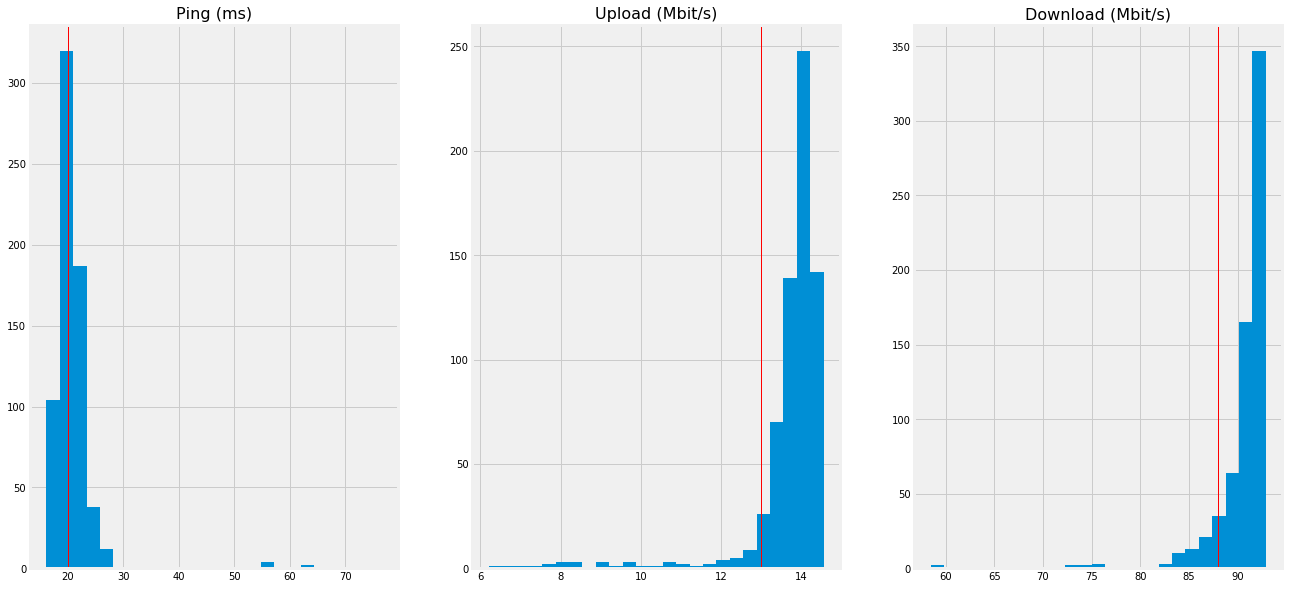

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

# plot ping speed
ax1.hist(df_compact['Ping (ms)'], 25)
# plot acceptable ping
ax1.axvline(acceptable_ping, color='red', linewidth=1)
ax1.set_title('Ping (ms)', fontsize=16)

# plot upload speed
ax2.hist(df_compact['Upload (Mbit/s)'], 25)
# plot acceptable upload
ax2.axvline(acceptable_upload, color='red', linewidth=1)
ax2.set_title('Upload (Mbit/s)', fontsize=16)

# plot download speed
ax3.hist(df_compact['Download (Mbit/s)'], 25)
# plot acceptable download
ax3.axvline(acceptable_download, color='red', linewidth=1)
ax3.set_title('Download (Mbit/s)', fontsize=16)

plt.show()

In [10]:
means = df_compact.mean()
stands = df_compact.std()

# this makes the results look better with labels
quote_ping = (means['Ping (ms)'], stands['Ping (ms)'])
quote_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
quote_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])

# print the results
print('Average Ping time: {} ± {} ms'.format(*quote_ping))
print('Average Download time: {} ± {} ms'.format(*quote_download))
print('Average Upload time: {} ± {} ms'.format(*quote_upload))

print('')
print('Distance of acceptable Ping speed from average: {:.2f} standard deviations'.format((quote_ping[0]-acceptable_ping)/quote_ping[1]))
print('Distance of acceptable Download speed from average: {:.2f} standard deviations'.format((quote_download[0]-acceptable_download)/quote_download[1]))
print('Distance of acceptable Upload speed from average: {:.2f} standard deviations'.format((quote_upload[0]-acceptable_upload)/quote_upload[1]))

Average Ping time: 21.113875000000007 ± 5.164907779028767 ms
Average Download time: 90.45629464285713 ± 3.4633514246179895 ms
Average Upload time: 13.69681547619048 ± 1.0810800645602712 ms

Distance of acceptable Ping speed from average: 0.22 standard deviations
Distance of acceptable Download speed from average: 0.71 standard deviations
Distance of acceptable Upload speed from average: 0.64 standard deviations


In [12]:
print('{:.2f}% of measurements are lower than the acceptable download speed.'.format(np.sum(df_compact['Download (Mbit/s)']<acceptable_download)/float(len(df_compact))*100))
print('{:.2f}% of measurements are lower than the acceptable upload speed.'.format(np.sum(df_compact['Upload (Mbit/s)']<acceptable_upload)/float(len(df_compact))*100))
print('{:.2f}% of measurements are lower than the acceptable upload speed.'.format(np.sum(df_compact['Ping (ms)']<acceptable_ping)/float(len(df_compact))*100))

10.86% of measurements are lower than the acceptable download speed.
7.89% of measurements are lower than the acceptable upload speed.
42.86% of measurements are lower than the acceptable upload speed.


In [14]:
all_three = np.sum((df_compact['Ping (ms)']<acceptable_ping) & (df_compact['Download (Mbit/s)']<acceptable_download) & (df_compact['Upload (Mbit/s)']<acceptable_upload))
print('{:.2f}% of measurements are not acceptable in three cases.'.format(all_three/float(len(df_compact))*100))

0.60% of measurements are not acceptable in three cases.


In [15]:
ping_upload = np.sum((df_compact['Ping (ms)']<acceptable_ping) & (df_compact['Upload (Mbit/s)']<acceptable_upload))
print('{:.2f}% of measurements are not acceptable for ping and upload.'.format(ping_upload/float(len(df_compact))*100))

ping_download = np.sum((df_compact['Ping (ms)']<acceptable_ping) & (df_compact['Download (Mbit/s)']<acceptable_download))
print('{:.2f}% of measurements are not acceptable for ping and download.'.format(ping_download/float(len(df_compact))*100))

download_upload = np.sum((df_compact['Download (Mbit/s)']<acceptable_download) & (df_compact['Upload (Mbit/s)']<acceptable_upload))
print('{:.2f}% of measurements are not acceptable for download and upload.'.format(download_upload/float(len(df_compact))*100))


2.98% of measurements are not acceptable for ping and upload.
4.61% of measurements are not acceptable for ping and download.
1.34% of measurements are not acceptable for download and upload.
